# Suy luận nhân quả

# Câu chuyện về Confounder, Collider và Covariate

### BS. Lê Ngọc Khả Nhi


# Nhập đề

Chứng minh hiệu quả của một loại thuốc hay can thiệp điều trị là một mục tiêu phổ biến trong nghiên cứu y học lâm sàng. Thông thường, câu hỏi nghiên cứu được phiên dịch thành bài toán thống kê như sau: 

Trước hết, một đại lượng sinh lý/bệnh học (định lượng) và/hoặc một biến cố lâm sàng (định tính) sẽ được chọn làm biến kết quả (Outcome, Y). 

Can thiệp điều trị (Treatment, T) thường được xét như một biến định tính (Thí dụ phân nhóm Điều trị/Giả dược, Có/không can thiệp), hoặc đôi khi bằng biến định lượng (cường độ, liều lượng, thời gian...).

Hiệu quả trị liệu được chứng minh thông qua việc ước lượng hiệu ứng của T đối với Y, thí dụ đơn giản nhất nếu T là biến nhị phân (phân nhóm điều trị và nhóm chứng), thì hiệu quả chính là khác biệt về giá trị Y giữa 2 phân nhóm T=1 so với T=0. Một mô hình hồi quy tuyến tính tổng quát (GLM) cho phép giải quyết dễ dàng bài toán này. 

Tuy nhiên thế giới thực không đơn giản như vậy, mỗi cá thể bệnh nhân là một hệ thống phức tạp, gồm sự biểu hiện và tương tác giữa nhiều yếu tố sinh lý bệnh khác nhau, góp phần thay đổi giá trị của Outcome Y hoặc đôi khi, một vài tham số lâm sàng có thể ảnh hưởng đồng thời đến cả chỉ định điều trị (T) và kết cục (Y). Ngoài ra, yếu tố điều trị cùng đại lượng Y có thể lại đồng thời gây hiệu ứng trên những yếu tố khác. Để đánh giá chính xác hiệu ứng thực sự của can thiệp điều trị ta cần khắc phục những yếu tố gây nhiễu này. 

Trong thí nghiệm này, Nhi sẽ mô phỏng một bài toán đánh giá hiệu quả trị liệu có sự hiện diện đồng thời của cả 3 yếu tố gây nhiễu gồm Covariate, Confounder và Collider; sau đó ta sẽ thử giải quyết bài toán bằng 2 phương pháp: 1) Cách làm quy ước thông qua mô hình tuyến tính tổng quát (GLM) và 2) Cách làm mới do Judea Pearl đề xuất (dựa trên sơ đồ nhân quả).

# Bài toán mô phỏng

Nhi sẽ tạo ra dữ liệu mô phỏng cho một bài toán sau đây:

Mục tiêu giả định là khảo sát hiệu quả điều trị của 2 loại thuốc, gọi là T1 và T2 đối với một bệnh lý D trên 2000 bệnh nhân. Mỗi loại thuốc sẽ được chỉ định một cách ngẫu nhiên cho 50% (phân nhóm được dùng thuốc: n=1000 bệnh nhân, phân nhóm chứng không được dùng thuốc: n=1000)
Kết cục lâm sàng được đo lường bằng đại lượng Y là 1 biến ngẫu nhiên liên tục. Sự cải thiện của bệnh lý được xác nhận nếu Y tăng, ngược lại Y giảm được xem là kết quả tiêu cực.

Dữ liệu quan sát được trên lâm sàng gồm 11 biến Y, T1, T2, X, C, W1,W2,W3,W4,W5,W6, giả định dữ liệu này được sinh ra từ một hệ thống với các quy luật như sau:

X (1 đại lượng lâm sàng) là 1 biến ngẫu nhiên có phân phối Gamma(a=1, b=1.7), X không ảnh hưởng đến xác suất được dùng thuốc T1 hoặc T2, nhưng một khi bệnh nhân bắt đầu dùng thuốc T1, X sẽ góp 1 phần nhỏ vào hiệu ứng điều trị (gọi là TE_1) và làm thay đổi Y. Do đó, ta nói X có vai trò là 1 hiệp biến (Covariate) của TE_1 (và của Y).

Loại thuốc T1 được chỉ định dựa trên 1 thang điểm lâm sàng, tạm gọi là T1_score; khi bệnh nhân có giá trị T1_score cao hơn trung vị trong quần thể, sẽ được xếp vào phân nhóm điều trị (T1=True), những bệnh nhân còn lại vào nhóm chứng (T1=False).
Bản thân T1_score này lại chịu chi phối bởi 3 biến W2, W4, W5. Đồng thời, 3 biến W2, W4, W5 lại có đóng góp độc lập vào phương sai của Y. Do đó, ta nói W2, W4, W5 là những Counfounders (vì chúng đồng thời chi phối xác suất được dùng thuốc T1, và có hiệu ứng độc lập làm thay đổi giá trị của Y).

3 biến W1, W3, W6 không có vai trò nào cả, chúng không gây hiệu ứng nào lên T1,T2 hoặc Y

T2 là một loại thuốc KHÔNG có hiệu quả điều trị nào cả đối với Y (TE_2 = 0, không đóng góp vào phương sai của Y); xác suất dùng thuốc T2 cũng là ngẫu nhiên, được sinh ra từ quy luật Binomial(1,0.5); tuy nhiên, việc dùng thuốc T2 sẽ gây hiệu ứng làm tăng giá trị của đại lượng C. Đồng thời, khi Y tăng thì C giảm. Như vậy, ta nói C có vai trò là 1 Collider, vì nó bị chi phối bởi cả T2 và Y.

Mục tiêu của bài toán là ước lượng 2 hiệu ứng điều trị TE_1, TE_2 và hiệu ứng tổng hợp khi dùng đồng thời cả 2 loại thuốc T1 và T2

In [1]:
warning_status = "ignore"
import warnings
warnings.filterwarnings(warning_status)
with warnings.catch_warnings():
    warnings.filterwarnings(warning_status, category=DeprecationWarning)
    warnings.filterwarnings(warning_status, category=UserWarning)

# Dataframe và random

import numpy as np
import pandas as pd
from itertools import product

# Đồ họa
import matplotlib.pyplot as plt
import seaborn as sns

# GLM
from patsy import dmatrices
import statsmodels.formula.api as smf

# Suy luận nhân quả
from causalgraphicalmodels import CausalGraphicalModel
from dowhy import CausalModel

# Xem infos
from sinfo import sinfo
sinfo()

-----
causalgraphicalmodels       NA
dowhy                       0.4
matplotlib                  3.2.1
numpy                       1.18.4
pandas                      1.0.3
patsy                       0.5.1
seaborn                     0.10.0
sinfo                       0.3.1
statsmodels                 0.11.1
-----
IPython             7.12.0
jupyter_client      5.3.4
jupyter_core        4.6.1
jupyterlab          1.2.6
notebook            6.0.3
-----
Python 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.18362-SP0
8 logical CPU cores, Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
-----
Session information updated at 2020-05-26 17:48


In [38]:
def simulate_data(n = 3000, n_w = 4, support_size = 2, n_x = 1):
    def exp_te(x):
        return np.exp(-1.8*x[0])
    
    np.random.seed(123)
    
    support_Y = np.random.choice(np.arange(n_w), size=support_size, replace=False)
    coefs_Y = np.random.uniform(0, 1, size=support_size)
    epsilon_sample = lambda n: np.random.normal(0, 0.25, size=n)
    
    support_T = support_Y
    coefs_T = np.random.uniform(0, 1, size=support_size)
    eta_sample = lambda n: np.random.normal(0, 0.3, size=n)
    
    W = np.random.gamma(0.5, 1, size=(n, n_w))
    X = np.random.gamma(1, 1.7, size=(n, n_x))
    
    TE = np.array([exp_te(x_i) for x_i in X])
    
    T = np.dot(W[:, support_T], coefs_T) + eta_sample(n)
    
    T_bin = (T >= np.median(T))*1

    Y = TE * T + np.dot(W[:, support_Y], coefs_Y) + epsilon_sample(n)
    
    T0_bin = np.random.binomial(1, 0.5, size = n)
    coef_CY = np.random.normal(2.29, 0.7, size=n)
    coef_CT = np.random.normal(1.8, 0.08, size=n)
    C = coef_CT*T0_bin - coef_CY*Y + epsilon_sample(n)
    
    df1 = pd.DataFrame({'Y': Y.flatten(),
                         'X' : X.flatten(),
                         'C': C.flatten(),
                         'T1': T_bin.flatten().astype('bool'),
                         'T2': T0_bin.flatten().astype('bool'),
                        })
    
    df2 = pd.DataFrame(W, columns = [f'W{i+1}' for i in range(n_w)])
    
    return pd.concat([df1,df2], axis = 1, sort= False)

In [39]:
df = simulate_data(n = 2000,
                   n_w = 6, 
                   support_size = 3, 
                   n_x = 1)

In [40]:
df.head(5)

,Y,X,C,T1,T2,W1,W2,W3,W4,W5,W6
0,0.625326,4.851743,-0.848143,True,False,0.160815,0.105074,0.557631,0.426383,0.007010,0.183067
1,1.056428,1.846614,-3.188507,False,False,0.242147,0.127970,0.469401,0.054996,0.773757,0.000783
2,0.832515,1.732087,-1.071247,True,False,0.023741,1.578676,0.554336,0.215545,0.091536,0.530374
3,0.715250,1.713662,-1.434963,False,False,0.011866,0.054213,0.721938,0.907253,0.116142,1.371515
4,1.237068,0.109745,0.063435,False,True,0.208619,1.124853,0.099204,0.032521,0.045070,0.025632


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       2000 non-null   float64
 1   X       2000 non-null   float64
 2   C       2000 non-null   float64
 3   T1      2000 non-null   bool   
 4   T2      2000 non-null   bool   
 5   W1      2000 non-null   float64
 6   W2      2000 non-null   float64
 7   W3      2000 non-null   float64
 8   W4      2000 non-null   float64
 9   W5      2000 non-null   float64
 10  W6      2000 non-null   float64
dtypes: bool(2), float64(9)
memory usage: 144.7 KB


# Thăm dò trực quan

### Phân bố của Y giữa 2 phân nhóm T1

Hình ảnh xác nhận T1 có hiệu ứng điều trị tích cực với Y, phù hợp với quy luật mô phỏng ta đã xác định ban đầu

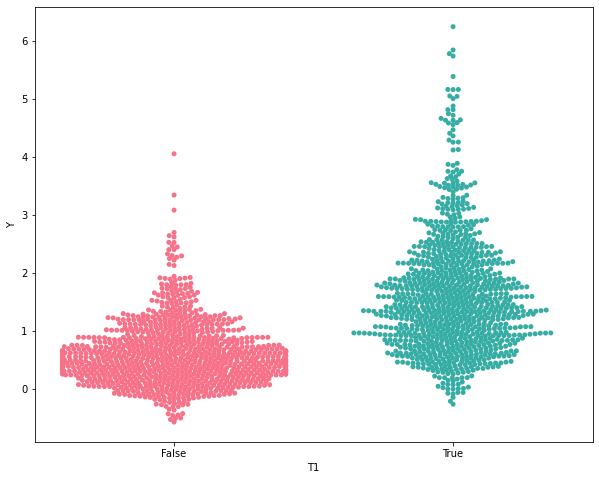

In [42]:
plt.figure(figsize=(10,8))
sns.swarmplot(x = "T1", 
              y = "Y", 
              data = df, 
              palette = 'husl')

### Quan hệ giữa X, W1, W2, W3, W4, W5, W6 và Y

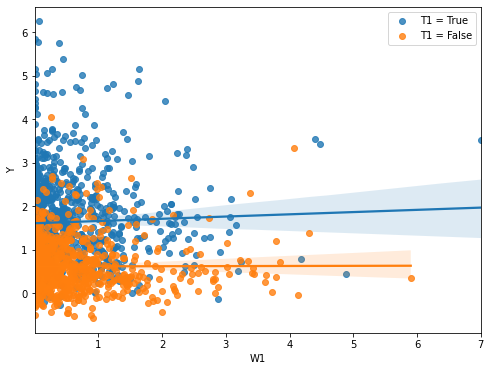

In [43]:
plt.figure(figsize=(8,6))

sns.regplot('W1','Y', data = df[df['T1'] == True], label = 'T1 = True')
sns.regplot('W1','Y', data = df[df['T1'] != True], label = 'T1 = False')
plt.legend()

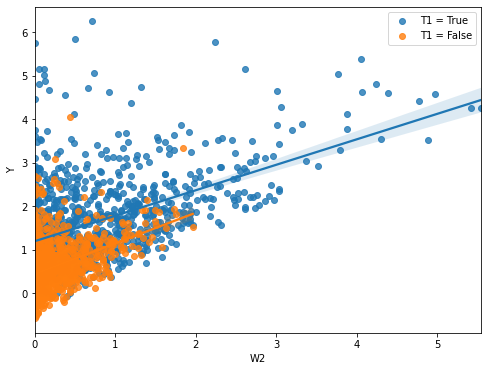

In [44]:
plt.figure(figsize=(8,6))

sns.regplot('W2','Y', data = df[df['T1'] == True], label = 'T1 = True')
sns.regplot('W2','Y', data = df[df['T1'] != True], label = 'T1 = False')
plt.legend()

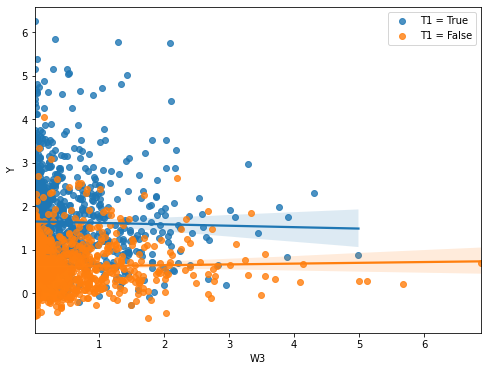

In [46]:
plt.figure(figsize=(8,6))

sns.regplot('W3','Y', data = df[df['T1'] == True], label = 'T1 = True')
sns.regplot('W3','Y', data = df[df['T1'] != True], label = 'T1 = False')
plt.legend()

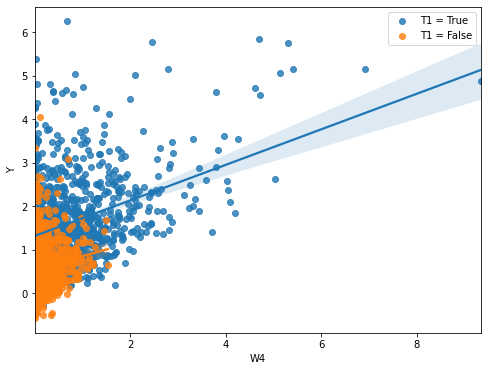

In [47]:
plt.figure(figsize=(8,6))

sns.regplot('W4','Y', data = df[df['T1'] == True], label = 'T1 = True')
sns.regplot('W4','Y', data = df[df['T1'] != True], label = 'T1 = False')
plt.legend()

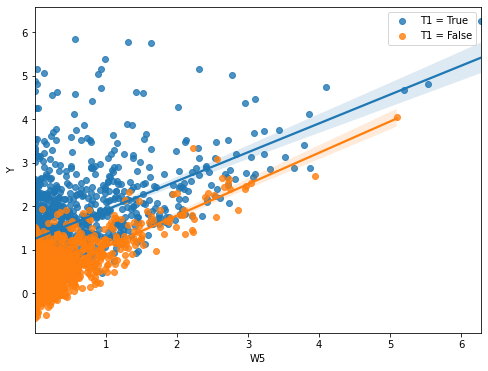

In [48]:
plt.figure(figsize=(8,6))

sns.regplot('W5','Y', data = df[df['T1'] == True], label = 'T1 = True')
sns.regplot('W5','Y', data = df[df['T1'] != True], label = 'T1 = False')
plt.legend()

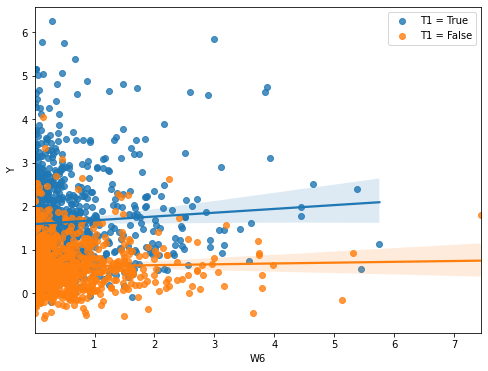

In [49]:
plt.figure(figsize=(8,6))

sns.regplot('W6','Y', data = df[df['T1'] == True], label = 'T1 = True')
sns.regplot('W6','Y', data = df[df['T1'] != True], label = 'T1 = False')
plt.legend()

Quan sát cho thấy W2, W4, W5 có quan hệ tuyến tính với Y, chúng có vai trò Confounders, W1, W3, W6 không có liên hệ gì với Y

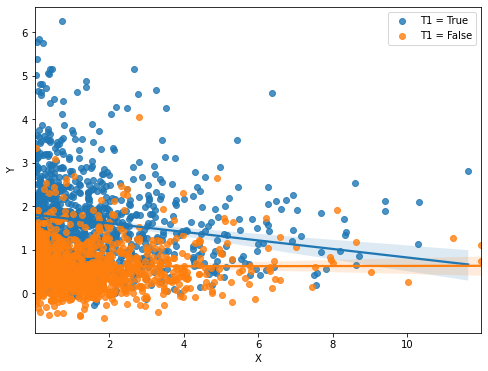

In [50]:
plt.figure(figsize=(8,6))

sns.regplot('X','Y', data = df[df['T1'] == True], label = 'T1 = True')
sns.regplot('X','Y', data = df[df['T1'] != True], label = 'T1 = False')
plt.legend()

In [ ]:
plt.figure(figsize=(8,6))

sns.regplot('W5','Y', data = df[df['T1'] == True], label = 'T1 = True')
sns.regplot('W5','Y', data = df[df['T1'] != True], label = 'T1 = False')
plt.legend()

### Quan hệ giữa collider C và Y

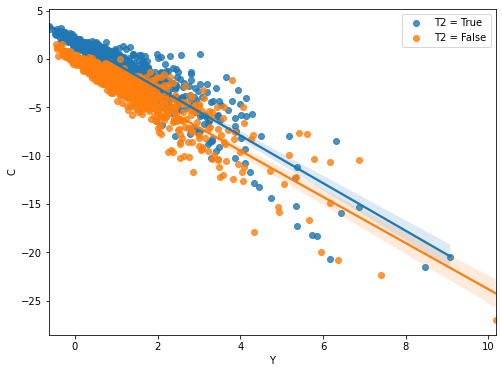

In [32]:
plt.figure(figsize=(8,6))

sns.regplot('Y','C', data = df[df['T2'] == True], label = 'T2 = True')
sns.regplot('Y','C', data = df[df['T2'] != True], label = 'T2 = False')
plt.legend()

# Mô hình hồi quy tuyến tính tổng quát (GLM)

Theo cách làm thường quy, ta dùng mô hình GLM và không sử dụng sơ đồ nhân quả.

## Khảo sát riêng loại thuốc T1

### Mô hình chỉ có T1

In [51]:
formula = "Y ~ T1"

smf.glm(formula, df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.65796
Method:                          IRLS   Log-Likelihood:                -2418.3
Date:                Tue, 26 May 2020   Deviance:                       1314.6
Time:                        18:23:24   Pearson chi2:                 1.31e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6140      0.026     23.936      0.000       0.564       0.664
T1[T.True]     1.0174      0.036     28.048      0.000       0.946       1.089
==============================================================================
"""

### Mô hình gồm T1 và Covariate X

In [52]:
formula = "Y ~ X + T1"

smf.glm(formula, df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1997
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                         0.65049
Method:                          IRLS   Log-Likelihood:                -2406.4
Date:                Tue, 26 May 2020   Deviance:                       1299.0
Time:                        18:24:04   Pearson chi2:                 1.30e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6984      0.031     22.675      0.000       0.638       0.759
T1[T.True]     1.0236      0.036     28.361      0.000       0.953       1.094
X             -0.0527      0.011     -4.890      0.000      -0.074      -0.032
==============================================================================
"""

### Mô hình gồm T1 và 3 counfounders

In [53]:
formula = "Y ~ T1 + W2 + W4 + W5"

smf.glm(formula, df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1995
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                         0.11582
Method:                          IRLS   Log-Likelihood:                -679.69
Date:                Tue, 26 May 2020   Deviance:                       231.07
Time:                        18:24:56   Pearson chi2:                     231.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0178      0.013     -1.411      0.158      -0.042       0.007
T1[T.True]     0.1101      0.018      5.958      0.000       0.074       0.146
W2             0.7976      0.012     65.228      0.000       0.774       0.822
W4             0.6158      0.012     52.520      0.000       0.593       0.639
W5             0.7947      0.012     68.470      0.000       0.772       0.817
==============================================================================
"""

### Mô hình tham lam

In [57]:
formula = "Y ~ X + T1 + W2 + W4 + W5 + W1 + W3 + W6"

smf.glm(formula, df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1991
Model Family:                Gaussian   Df Model:                            8
Link Function:               identity   Scale:                         0.10360
Method:                          IRLS   Log-Likelihood:                -566.18
Date:                Tue, 26 May 2020   Deviance:                       206.27
Time:                        18:28:46   Pearson chi2:                     206.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0858      0.016      5.286      0.000       0.054       0.118
T1[T.True]     0.1114      0.017      6.370      0.000       0.077       0.146
X             -0.0657      0.004    -15.237      0.000      -0.074      -0.057
W2             0.8071      0.012     69.610      0.000       0.784       0.830
W4             0.6195      0.011     55.775      0.000       0.598       0.641
W5             0.7949      0.011     72.292      0.000       0.773       0.817
W1            -0.0201      0.010     -1.950      0.051      -0.040       0.000
W3             0.0188      0.011      1.781      0.075      -0.002       0.040
W6            -0.0017      0.010     -0.168      0.866      -0.021       0.018
==============================================================================
"""

In [58]:
formula = "Y ~ X + T1 + W2 + W4 + W5 + W1 + W3 + W6 + C"

smf.glm(formula, df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1990
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                        0.082259
Method:                          IRLS   Log-Likelihood:                -334.98
Date:                Tue, 26 May 2020   Deviance:                       163.69
Time:                        18:33:19   Pearson chi2:                     164.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1504      0.015     10.203      0.000       0.122       0.179
T1[T.True]     0.0872      0.016      5.583      0.000       0.057       0.118
X             -0.0544      0.004    -14.037      0.000      -0.062      -0.047
W2             0.6357      0.013     49.722      0.000       0.611       0.661
W4             0.4929      0.011     43.417      0.000       0.471       0.515
W5             0.6423      0.012     54.083      0.000       0.619       0.666
W1            -0.0171      0.009     -1.856      0.064      -0.035       0.001
W3             0.0224      0.009      2.373      0.018       0.004       0.041
W6            -0.0089      0.009     -1.008      0.313      -0.026       0.008
C             -0.0909      0.004    -22.751      0.000      -0.099      -0.083
==============================================================================
"""

Nhận xét: Với T1, các mô hình tuyến tính đều cho ra kết quả phù hợp với giả định ban đầu về vai trò của các biến; tuy nhiên, cho mục tiêu của bài toán là ước lượng chính xác TE_1 (hiệu ứng của riêng T1 = True đối với outcome Y), kết quả mà ta nhận được phụ thuộc rất nhiều vào lựa chọn đưa bao nhiêu biến, và đưa biến nào vào mô hình.

Nếu không được dẫn đường bằng sơ đồ nhân quả/ quy luật sinh lý bệnh học/ suy luận logic, mà chỉ dùng duy nhất mô hình GLM, ta gần như không thể phân định được vai trò Counfounders của W2,W4,W5 trong 6 biến W1-W6, và cũng không rõ vai trò của Covariate X và Collider C. 

Tiếp theo, ta sẽ thấy việc dùng GLM một cách ngây thơ sẽ gây nguy cơ sai lầm như thế nào, đối với loại thuốc T2:

## Loại thuốc T2

###  Mô hình chỉ có  T2

Khi chỉ xét một mình T2, ta thấy mô hình GLM cho ra kết quả phù hợp với giả định: T2 không có hiệu quả điều trị ý nghĩa

In [59]:
formula = "Y ~ T2 "

smf.glm(formula, df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.91594
Method:                          IRLS   Log-Likelihood:                -2749.1
Date:                Tue, 26 May 2020   Deviance:                       1830.1
Time:                        18:39:41   Pearson chi2:                 1.83e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1546      0.030     38.623      0.000       1.096       1.213
T2[T.True]    -0.0654      0.043     -1.527      0.127      -0.149       0.019
==============================================================================
"""

# Mô hình chứa T2 và covariate X

Khi đưa thêm covariate X vào mô hình, kết quả vẫn còn hợp lý

In [60]:
formula = "Y ~ T2 + X"

smf.glm(formula, df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1997
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                         0.91141
Method:                          IRLS   Log-Likelihood:                -2743.6
Date:                Tue, 26 May 2020   Deviance:                       1820.1
Time:                        18:40:14   Pearson chi2:                 1.82e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2249      0.037     33.438      0.000       1.153       1.297
T2[T.True]    -0.0661      0.043     -1.548      0.122      -0.150       0.018
X             -0.0422      0.013     -3.307      0.001      -0.067      -0.017
==============================================================================
"""

# mô hình chứa Collider và T2

Tuy nhiên, nếu ta đưa collider C vào mô hình chung với T2, ta sẽ thấy một bước ngoặt, đó là hiệu ứng T2 bỗng nhiên trở nên tích cực và có ý nghĩa thống kê 

Hiện tượng này chính là sai lầm phổ biến, khi người ta lạm dụng việc 'hiệu chỉnh' (control, adjust) một cách mù quáng, thà lầm hơn bỏ sót, nếu control nhầm những biến vô nghĩa như W1,W3,W6 thì không sao cả, nhưng chỉ cần nhầm collider thì ngay lập tức tạo ra mối tương quan giả giữa Y và T2, vốn không tồn tại. 

In [61]:
formula = "Y ~ T2 + C"

smf.glm(formula, df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1997
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                         0.18936
Method:                          IRLS   Log-Likelihood:                -1172.3
Date:                Tue, 26 May 2020   Deviance:                       378.16
Time:                        18:44:00   Pearson chi2:                     378.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2021      0.017     11.611      0.000       0.168       0.236
T2[T.True]     0.6668      0.021     31.473      0.000       0.625       0.708
C             -0.3589      0.004    -87.563      0.000      -0.367      -0.351
==============================================================================
"""

 ### Mô hình chứa Collider và Covariate

In [63]:
formula = "Y ~ T2 + C + X"

smf.glm(formula, df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1996
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                         0.18874
Method:                          IRLS   Log-Likelihood:                -1168.5
Date:                Tue, 26 May 2020   Deviance:                       376.73
Time:                        18:45:19   Pearson chi2:                     377.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2303      0.020     11.414      0.000       0.191       0.270
T2[T.True]     0.6654      0.021     31.446      0.000       0.624       0.707
C             -0.3583      0.004    -87.448      0.000      -0.366      -0.350
X             -0.0160      0.006     -2.750      0.006      -0.027      -0.005
==============================================================================
"""

### mô hình chứa Collider và tham lam

In [62]:
formula = "Y ~ T2 + C + X + W1 + W2 + W3 + W4 + W5 + W6"

smf.glm(formula, df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1990
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                        0.070826
Method:                          IRLS   Log-Likelihood:                -185.33
Date:                Tue, 26 May 2020   Deviance:                       140.94
Time:                        18:44:44   Pearson chi2:                     141.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0571      0.015      3.907      0.000       0.028       0.086
T2[T.True]     0.2764      0.015     18.906      0.000       0.248       0.305
C             -0.1419      0.005    -31.318      0.000      -0.151      -0.133
X             -0.0477      0.004    -13.213      0.000      -0.055      -0.041
W1            -0.0150      0.009     -1.759      0.079      -0.032       0.002
W2             0.5665      0.012     46.068      0.000       0.542       0.591
W3             0.0182      0.009      2.077      0.038       0.001       0.035
W4             0.4495      0.010     42.979      0.000       0.429       0.470
W5             0.5666      0.012     48.007      0.000       0.543       0.590
W6            -0.0092      0.008     -1.122      0.262      -0.025       0.007
==============================================================================
"""

# Cách làm mới, có định hướng bằng sơ đồ nhân quả

Bây giờ, Nhi sẽ áp dụng quy trình suy diễn nhân quả theo Judea Pearl đề xuất. Sự khác biệt quan trọng ở đây là chúng ta cần thiết lập một sơ đồ nhân quả (Causal diagram) để mô tả hệ thống, thậm chí trước khi dùng đến dữ liệu. Suy diễn thống kê sẽ được định hướng bởi sơ đồ này.

Làm cách nào để tạo ra Causal diagram ? Ta cần dựa vào kiến thức y học và suy luận logic; thí dụ ta biết loại thuốc T1 được chỉ định trên lâm sàng dựa vào độ nặng của bệnh lý, được biểu hiện qua 3 triệu chứng W2, W4, W5, ta sẽ vẽ các mũi tên liên kết để W2,W4,W5 đóng vai trò confounders; tương tự, ta biết X và Y là 2 covariate, do đó ta vẽ mũi tên từ X đến Y. 

## Thiết lập sơ đồ nhân quả

Sử dụng thư viện causalgraphicalmodels, ta có thể trình bày lại toàn bộ hệ thống quy luật sinh dữ liệu trong Causal diagram như sau:

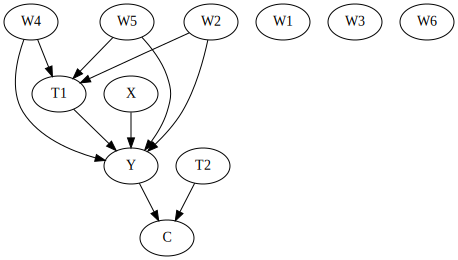

In [67]:
model_obs = CausalGraphicalModel(
    nodes= [i for i in df.columns],
    edges = [('X','Y'),
             ('T1','Y'),
             ('W2','T1'),
             ('W4', 'T1'),
             ('W5', 'T1'),
             ('W2','Y'),
             ('W4', 'Y'),
             ('W5', 'Y'),
             ('Y', 'C'),
             ('T2', 'C'),
            ])

model_obs.draw()

## Dựng mô hình bằng thư viện dowhy

### Đánh giá riêng TE_1

Thư viện dowhy cho phép chúng ta thực hành suy diễn nhân quả theo phương pháp của Pearl một cách dễ dàng, đầu tiên ta lập mô hình với dataframe dữ liệu, treatment, outcome và causal diagram dưới hình thức sơ đồ định hướng (directed graph)

In [73]:
dg = 'digraph {T1->Y; W2->Y; W4->Y; W5->Y; X->Y; W2 -> T1; W4->T1; W5->T1}'

from dowhy import CausalModel

model = CausalModel(df[['T1','X','W2','W4','W5','Y']],
                    treatment = ['T1'],
                    outcome = ['Y'],
                   graph = dg)

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['T1'] on outcome ['Y']


Bước tiếp theo, xác định những tham số cần ước lượng (estimands)

In [74]:
identified_estimand = model.identify_effect()

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['W2', 'U', 'W4', 'W5']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] 
Please respond with 'y' or 'n'
WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


INFO:dowhy.causal_graph:Using Matplotlib for plotting


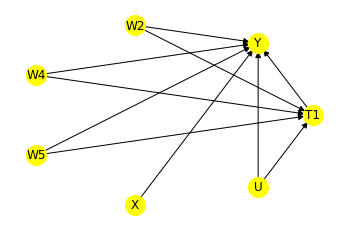

In [75]:
model.view_model()

In [76]:
print(identified_estimand)

Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                           
─────(Expectation(Y|W2,W4,W5))
d[T₁]                         
Estimand assumption 1, Unconfoundedness: If U→{T1} and U→Y then P(Y|T1,W2,W4,W5,U) = P(Y|T1,W2,W4,W5)
### Estimand : 2
Estimand name: iv
No such variable found!



Như ta thấy, dowhy xác định estimand là average treatment effect (ATE) của T1, nó cũng tự động áp dụng do calculus và back door adjustment.

Sau khi xác định estimand từ causal diagram ta có thể áp dụng nhiều phương pháp suy diễn khác nhau, thí dụ mô hình tuyến tính có hiệu chỉnh backdoor, hoặc các phương pháp dựa vào propensity scores...

## Phương pháp backdoor.linear_regression

In [81]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True, 
        confidence_intervals=True,
        target_units="ate") # average treatment effect
print(causal_estimate_reg)

print("Causal effect = " + str(causal_estimate_reg.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: Y~T1+W2+W4+W5+T1*X


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                           
─────(Expectation(Y|W2,W4,W5))
d[T₁]                         
Estimand assumption 1, Unconfoundedness: If U→{T1} and U→Y then P(Y|T1,W2,W4,W5,U) = P(Y|T1,W2,W4,W5)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: Y~T1+W2+W4+W5+T1*X
Target units: ate

## Estimate
Mean value: 0.10987214578673732
p-value: [1.87813117e-47]
Standard error: [0.0194576]
95.0% confidence interval: [[0.25098276 0.32730149]]
### Conditional Estimates
__categorical__X
(-0.00038, 0.371]    0.270750
(0.371, 0.834]       0.224784
(0.834, 1.544]       0.160965
(1.544, 2.621]       0.072401
(2.621, 11.985]     -0.179539
dtype: float64
Causal effect = 0.10987214578673732


## Phương pháp propensity_score_stratification

In [94]:
# ATC: Giá trị trung bình cho quần thể

causal_estimate_strat = model.estimate_effect(identified_estimand,
                                              method_name="backdoor.propensity_score_stratification",
                                              target_units="atc")
print(causal_estimate_strat)
print("Causal Estimate = " + str(causal_estimate_strat.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: Y~T1+W2+W4+W5


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                           
─────(Expectation(Y|W2,W4,W5))
d[T₁]                         
Estimand assumption 1, Unconfoundedness: If U→{T1} and U→Y then P(Y|T1,W2,W4,W5,U) = P(Y|T1,W2,W4,W5)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: Y~T1+W2+W4+W5
Target units: atc

## Estimate
Mean value: 0.19226724732779468

Causal Estimate = 0.19226724732779468


In [95]:
# ATT = Chỉ tính trung bình cho nhóm những người được điều trị

causal_estimate_strat = model.estimate_effect(identified_estimand,
                                              method_name="backdoor.propensity_score_stratification",
                                              target_units="att")
print(causal_estimate_strat)
print("Causal Estimate = " + str(causal_estimate_strat.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: Y~T1+W2+W4+W5


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                           
─────(Expectation(Y|W2,W4,W5))
d[T₁]                         
Estimand assumption 1, Unconfoundedness: If U→{T1} and U→Y then P(Y|T1,W2,W4,W5,U) = P(Y|T1,W2,W4,W5)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: Y~T1+W2+W4+W5
Target units: att

## Estimate
Mean value: 0.16640720752403232

Causal Estimate = 0.16640720752403232


In [96]:
# ATE = tính treatment effect trung bình cho quần thể từ những treatment effect cá thể

causal_estimate_strat = model.estimate_effect(identified_estimand,
                                              method_name="backdoor.propensity_score_stratification",
                                              target_units="ate")
print(causal_estimate_strat)
print("Causal Estimate = " + str(causal_estimate_strat.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: Y~T1+W2+W4+W5


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                           
─────(Expectation(Y|W2,W4,W5))
d[T₁]                         
Estimand assumption 1, Unconfoundedness: If U→{T1} and U→Y then P(Y|T1,W2,W4,W5,U) = P(Y|T1,W2,W4,W5)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: Y~T1+W2+W4+W5
Target units: ate

## Estimate
Mean value: 0.18027418538981796

Causal Estimate = 0.18027418538981796


# Khảo sát đồng thời TE1 và TE2

Ta bắt buộc dùng phương pháp hồi quy tuyến tính hiệu chỉnh backdoor, vì dowhy không hỗ trợ propensity scores cho thí nghiệm nhiều treatments (nhưng thư viện econML thì cho phép làm điều này, bạn có thể thử dùng DML của econML) 

## Dựng mô hình gồm TE1 và TE2

Mô hình này chứa cả T1, T2, C, X, W2, W4 và W5;

Lưu ý: dù ta biết trước rằng T2 không có hiệu ứng nào cả, nhưng trên causal diagram ta vẫn phải vẽ mũi tên liên kết T2 đến Y, để có thể ước tính TE2.

In [100]:
dg = 'digraph {T1->Y; W2->Y; W4->Y; W5->Y; X->Y; W2 -> T1; W4->T1; W5->T1; T2->C; Y->C; T2->Y}'

from dowhy import CausalModel

model = CausalModel(df[['T1','X','W2','W4','W5','Y','T2','C']],
                    treatment = ['T1', 'T2'],
                    outcome = ['Y'],
                   graph = dg)

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['T1', 'T2'] on outcome ['Y']


INFO:dowhy.causal_graph:Using Matplotlib for plotting


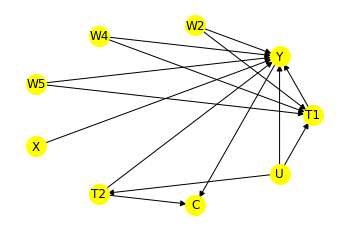

In [104]:
model.view_model()

In [103]:
identified_estimand = model.identify_effect()

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['W2', 'U', 'W4', 'W5']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


In [105]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        confidence_intervals=True,
        test_significance=True,target_units="ate")

print(causal_estimate_reg)
print("Causal Estimate : " + str(causal_estimate_reg.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: Y~T1+T2+W2+W4+W5+T1*X+T2*X


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                             
─────────(Expectation(Y|W2,W4,W5))
d[T₁  T₂]                         
Estimand assumption 1, Unconfoundedness: If U→{T1,T2} and U→Y then P(Y|T1,T2,W2,W4,W5,U) = P(Y|T1,T2,W2,W4,W5)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: Y~T1+T2+W2+W4+W5+T1*X+T2*X
Target units: ate

## Estimate
Mean value: 0.12113697865802053
p-value: [1.20628089e-42 1.56806474e-01]
Standard error: [0.02015083 0.01816391]
95.0% confidence interval: [[ 0.24294581  0.32198362]
 [-0.00989438  0.06135014]]
### Conditional Estimates
__categorical__X
(-0.00038, 0.371]    0.289002
(0.371, 0.834]       0.241039
(0.834, 1.544]       0.174449
(1.544, 2.621]       0.082038
(2.621, 11.985]     -0.180843
dtype: float64
Causal Estimate : 0.12113697865802053


Theo kết quả này, hiệu ứng trung bình TE_1 của loại thuốc 1 có ý nghĩa thống kê (p = 1.20628089e-42, khoảng tin cậy 0.242 đến 0.3219;

Nhưng hiệu ứng TE_2 của thuốc T2 thì không có ý nghĩa: p = 0.156; khoảng tin cậy -0.0098 đến 0.061 có chứa giá trị 0

Hiệu ứng tổng hợp của TE_1 và TE_2 có giá trị trung bình = 0.1211

# Kết luận

Qua thí nghiệm này, ta có thể phân biệt vai trò và ý nghĩa của các yếu tố Covariate, Collider và Confounders trong dữ liệu y học lâm sàng. Nhận định rằng bản thân dữ liệu không quan trọng bằng quy luật sinh ra dữ liệu - là một lời khuyên xác đáng. Ta cũng nhận ra là nếu chỉ dùng mô hình GLM mà không có sự định hướng bởi Causal diagram, đặc biệt thói quen không chọn lọc các biến số để đưa vào mô hình, và hiệu chỉnh máy móc hàng loạt biến có thể dẫn tới sai lầm, nhẹ thì gây ra sai biệt giữa các kết quả nghiên cứu, nặng có thể đảo ngược hoàn toàn kết quả nếu control nhầm một collider. Cách tiếp cận có định hướng bằng causal diagram giúp hạn chế những sai lầm này. Ta cũng làm quen với quy trình suy diễn nhân quả với thư viện dowhy.